# Auto ML model

The final model we explored is an Auto ML model. This is a bit more of a black box model, which is tree based.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os
import pandas as pd
from scipy import ndimage
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor

C:\Users\Jeroen.cro\Anaconda3\envs\LAI-prediction-2\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
def calculate_centroid_and_area(image):
    
    img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    mask = cv2.inRange(img_hsv,(31, 69, 20), (82, 255, 255))
    
    area = np.sum(mask)/255
    centroid = ndimage.center_of_mass(mask)
    
    return [area,centroid]

In [3]:
# Assumes there are an equal number of top and front images
number_of_files = len([name for name in os.listdir('../Images') if name[0]!="."])
number_of_plants = int(number_of_files / 2)

results = pd.DataFrame(columns=['Plant_number', 'Area_front', 'Centroid_front', 'Area_top', 'Centroid_top'])

for x in range(number_of_plants):
    row = []
    
    row.append("Plant" + str(x+1))
    
    image_front = cv2.imread(f'../Images/Plant{x+1}_front_Color.png')
    image_top = cv2.imread(f'../Images/Plant{x+1}_top_Color.png')
    
    front_result = calculate_centroid_and_area(image_front)
    top_result = calculate_centroid_and_area(image_top)
    
    row = row + front_result + top_result
    
    results.loc[len(results)] = row
    
print(results)
    

   Plant_number  Area_front                           Centroid_front  \
0        Plant1     72055.0   (321.6569009784193, 667.9332315592256)   
1        Plant2     68354.0   (335.5661702314422, 706.0572607309009)   
2        Plant3     40422.0  (401.83724209588837, 649.1364850823809)   
3        Plant4     62747.0  (331.01727572632956, 692.3932937032846)   
4        Plant5     56655.0   (351.8390433324508, 751.1261671520607)   
5        Plant6     36733.0   (376.9781667710233, 719.6792802112542)   
6        Plant7     58318.0  (398.34088960526765, 653.4697691964745)   
7        Plant8     69904.0  (419.84069581139846, 630.2788395513847)   
8        Plant9     62220.0  (437.33539054966246, 648.5444069431051)   
9       Plant10     41865.0    (406.4778693419324, 614.602651379434)   
10      Plant11     58057.0    (392.908744854195, 675.5261208812029)   
11      Plant12     96526.0    (350.6438472535897, 666.881534508837)   
12      Plant13     90898.0    (352.8019208343418, 696.223525270

In [4]:
PlantData = pd.read_csv("../PlantData.csv")

In [5]:
Data = results.join(PlantData.set_index('Plant_number'), on='Plant_number')

In [97]:
Data

,Plant_number,Area_front,Centroid_front,Area_top,Centroid_top,LAI
0,Plant1,75518.0,"(323.06533541672184, 667.4142853359464)",95805.0,"(268.9001617869631, 689.7002452899118)",720.31
1,Plant2,76249.0,"(332.69353040695614, 699.1289066086113)",101192.0,"(308.01920112261837, 672.0332338524785)",843.04
2,Plant3,44534.0,"(401.87218754210267, 650.1898773970449)",58495.0,"(348.781793315668, 682.289717069835)",486.23
3,Plant4,71101.0,"(320.9960338110575, 693.329376520724)",87672.0,"(333.012615202117, 683.0358837485172)",826.31
4,Plant5,60369.0,"(350.9807848399013, 750.0965727442892)",77101.0,"(328.5638967069169, 605.6901077807032)",755.65
5,Plant6,39877.0,"(376.9362038267673, 716.3728715801088)",58977.0,"(381.90167353375045, 629.8197093782322)",750.63
6,Plant7,62183.0,"(400.5010694241191, 661.2424617660776)",59821.0,"(312.7999699102322, 739.7305795623611)",492.84
7,Plant8,76078.0,"(420.333815294829, 645.5247246247272)",67922.0,"(315.4185978033627, 740.2675863490474)",797.91
8,Plant9,67271.0,"(436.5337366770228, 658.2362979590016)",59761.0,"(319.75457237998023, 728.2413446896805)",609.88
9,Plant10,50986.0,"(409.22655238692977, 640.7716628093987)",62153.0,"(363.07357649670973, 740.9204382732934)",661.81


In [98]:
Data['Centroid_top_x'] = pd.DataFrame(Data['Centroid_top'].tolist(), index=Data.index)[0]
Data['Centroid_top_y'] = pd.DataFrame(Data['Centroid_top'].tolist(), index=Data.index)[1]
Data['Centroid_front_x'] = pd.DataFrame(Data['Centroid_front'].tolist(), index=Data.index)[0]
Data['Centroid_front_y'] = pd.DataFrame(Data['Centroid_front'].tolist(), index=Data.index)[1]
Data

,Plant_number,Area_front,Centroid_front,Area_top,Centroid_top,LAI,Centroid_top_x,Centroid_top_y,Centroid_front_x,Centroid_front_y
0,Plant1,75518.0,"(323.06533541672184, 667.4142853359464)",95805.0,"(268.9001617869631, 689.7002452899118)",720.31,268.900162,689.700245,323.065335,667.414285
1,Plant2,76249.0,"(332.69353040695614, 699.1289066086113)",101192.0,"(308.01920112261837, 672.0332338524785)",843.04,308.019201,672.033234,332.693530,699.128907
2,Plant3,44534.0,"(401.87218754210267, 650.1898773970449)",58495.0,"(348.781793315668, 682.289717069835)",486.23,348.781793,682.289717,401.872188,650.189877
3,Plant4,71101.0,"(320.9960338110575, 693.329376520724)",87672.0,"(333.012615202117, 683.0358837485172)",826.31,333.012615,683.035884,320.996034,693.329377
4,Plant5,60369.0,"(350.9807848399013, 750.0965727442892)",77101.0,"(328.5638967069169, 605.6901077807032)",755.65,328.563897,605.690108,350.980785,750.096573
5,Plant6,39877.0,"(376.9362038267673, 716.3728715801088)",58977.0,"(381.90167353375045, 629.8197093782322)",750.63,381.901674,629.819709,376.936204,716.372872
6,Plant7,62183.0,"(400.5010694241191, 661.2424617660776)",59821.0,"(312.7999699102322, 739.7305795623611)",492.84,312.799970,739.730580,400.501069,661.242462
7,Plant8,76078.0,"(420.333815294829, 645.5247246247272)",67922.0,"(315.4185978033627, 740.2675863490474)",797.91,315.418598,740.267586,420.333815,645.524725
8,Plant9,67271.0,"(436.5337366770228, 658.2362979590016)",59761.0,"(319.75457237998023, 728.2413446896805)",609.88,319.754572,728.241345,436.533737,658.236298
9,Plant10,50986.0,"(409.22655238692977, 640.7716628093987)",62153.0,"(363.07357649670973, 740.9204382732934)",661.81,363.073576,740.920438,409.226552,640.771663


In [6]:
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

X = Data.drop(columns = ['LAI','Plant_number','Centroid_top','Centroid_front']).copy()
y = Data['LAI']

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state=42)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


In [7]:
pipeline_optimizer = TPOTRegressor(generations=50, population_size=20, cv=5,
                                    random_state=42, verbosity=2)
pipeline_optimizer.fit(X_train, y_train)

                                                                              
Generation 1 - Current best internal CV score: -15542.216367889045
                                                                              
Generation 2 - Current best internal CV score: -15542.216367889045
                                                                              
Generation 3 - Current best internal CV score: -15542.216367889045
                                                                               
Generation 4 - Current best internal CV score: -15471.200112898285
                                                                               
Generation 5 - Current best internal CV score: -15471.200112898285
                                                                               
Generation 6 - Current best internal CV score: -15471.200112898285
                                                                               
Generation 7 - Current best internal CV s

TPOTRegressor(generations=50, population_size=20, random_state=42, verbosity=2)

The Auto ML model also performs quite well with a MAE of 5,2%

67.87093207978056
   Actuals  Predictions  Plant Numbers
2   964.64   951.546839              1
0  1199.86  1061.575843              2
3  1216.18  1289.154634              3
9  1220.36  1212.425052              4
8  1321.61  1303.040089              5
7  1335.69  1253.627799              6
5  1343.02  1439.829413              7
6  1358.58  1273.334434              8
4  1363.92  1394.401423              9
1  1606.91  1473.656094             10


C:\Users\Jeroen.cro\Anaconda3\envs\LAI-prediction-2\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


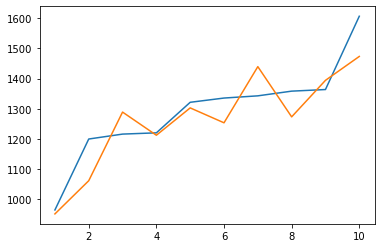

In [8]:
X_test = X_rem

close_predictions = pipeline_optimizer.predict(X_test)   

mae = sum(abs(close_predictions - y_rem)) / y_rem.shape[0]


print(mae)
RF_results = pd.DataFrame(columns = ['Actuals'])
RF_results['Predictions'] = close_predictions
RF_results['Actuals'] = y_rem.to_list()




RF_results.sort_values(by=['Actuals'],inplace = True)
RF_results['Plant Numbers'] = np.arange(1,11).tolist()
print(RF_results)

plt.plot(RF_results['Plant Numbers'],RF_results['Actuals'],RF_results['Plant Numbers'],RF_results['Predictions'])

In [9]:
mae/np.average(RF_results['Actuals'])

0.05248792769477809